<a href="https://colab.research.google.com/github/Shantanu-Dhole/Predicting-Client-Subscription-for-Term-Deposit/blob/main/Python_Group_12_Predicting_Client_Subscription_for_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Loading the csv file containing the raw data
df = pd.read_csv("Predicting Client Subscription for Term Deposit​.csv")
df.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
# Gives No. of rows and columns in data 

df.shape 

(41188, 21)

In [ ]:
#describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#isnull(). sum(). returns the number of missing values in the data set

df.isnull().sum()

y                 0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

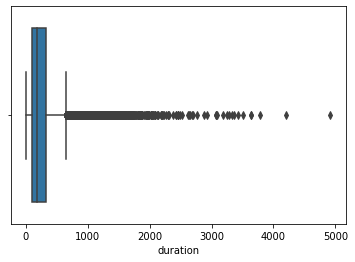

In [ ]:
#Plotting the box plot for duration
sns.boxplot(data=df,x='duration')

In [ ]:
#Scaling 
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(df[['duration']])
scaling.fit_transform(df[['duration']])


array([[ 0.01047142],
       [-0.42150051],
       [-0.12451981],
       ...,
       [-0.26722482],
       [ 0.70856893],
       [-0.07438021]])

In [ ]:
#taking zscore 
df['zscore'] = (df.duration-df.duration.mean())/df.duration.std()
df.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,zscore
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.010471
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,-0.421495
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,-0.124518
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,-0.413782
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.187886


In [ ]:
df[(df.zscore<-3) | (df.zscore>3)]


,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,zscore
37,no,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,1666,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,5.429339
75,yes,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,5.078366
83,yes,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,3.022668
88,yes,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,4.661827
164,no,39,services,divorced,high.school,unknown,no,no,telephone,may,mon,2033,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,6.844801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40880,yes,28,admin.,single,high.school,no,no,no,cellular,oct,wed,1246,2,999,0,nonexistent,-1.1,94.601,-49.5,0.959,4963.6,3.809464
40970,yes,24,admin.,single,university.degree,no,yes,no,cellular,oct,fri,1176,3,3,2,success,-1.1,94.601,-49.5,0.993,4963.6,3.539485
41121,no,46,admin.,single,university.degree,no,yes,no,cellular,nov,tue,1166,3,999,1,failure,-1.1,94.767,-50.8,1.046,4963.6,3.500916
41123,yes,36,blue-collar,single,basic.6y,no,no,no,cellular,nov,tue,1556,4,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,5.005086


In [ ]:
df_duration_no_outliers = df[(df.zscore>-3) | (df.zscore<3)]
df_duration_no_outliers.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,zscore
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.010471
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,-0.421495
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,-0.124518
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,-0.413782
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.187886


In [ ]:
df.shape[0]-df_duration_no_outliers.shape[0]

0

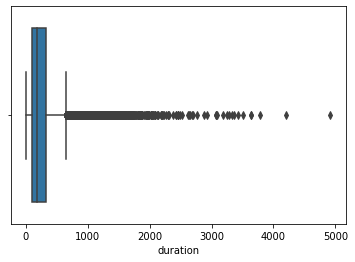

In [ ]:
#Box plot after outlier treatment
sns.boxplot(data=df,x='duration')

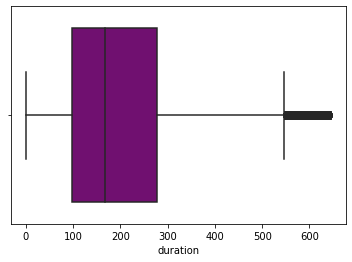

In [ ]:
#Removing the outliers 

q3 = df['duration'].quantile(.75)
q1 = df['duration'].quantile(.25)
iqr = q3-q1
iqr
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df1 = df[(df['duration']>bottomrange) & (df['duration']<upperrange)]
sns.boxplot(data=df1,x='duration',color = 'purple')

In [ ]:
df1.shape

(38225, 22)

In [ ]:
dfnew = df1[(df.duration<490)]
dfnew.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(36081, 22)

In [ ]:
dfnew.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,zscore
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,0.010471
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,-0.421495
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,-0.124518
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,-0.413782
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,0.187886


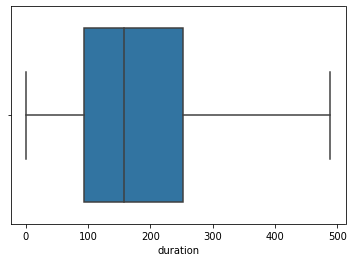

In [ ]:
##Box plot after outlier treatment
sns.boxplot(data=dfnew,x='duration')

In [ ]:
Subscription_count = pd.DataFrame(dfnew['y'].value_counts())
Subscription_count

,y
no,33576
yes,2505


<function matplotlib.pyplot.show>

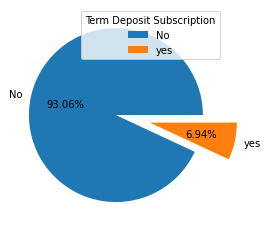

In [ ]:
#Exploratory data analysis of percentage of customers applied for a term deposit or not 
myexplode = [0, 0.4]
plt.pie(Subscription_count['y'], labels = ['No','yes'],autopct='%1.2f%%',explode = myexplode)
plt.legend()
plt.legend(title = "Term Deposit Subscription")
plt.show

<function matplotlib.pyplot.show>

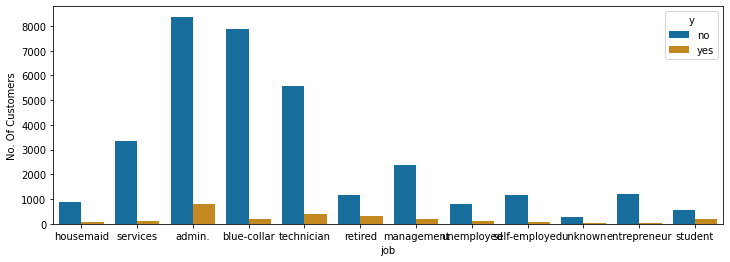

In [ ]:
#shows the no.of customers vs Client's Term Deposit Subscription Status
plt.subplots(figsize=(12,4))
sns.countplot(x ='job', hue = 'y', data = dfnew, palette = 'colorblind')
plt.ylabel('No. Of Customers')
plt.show

<function matplotlib.pyplot.show>

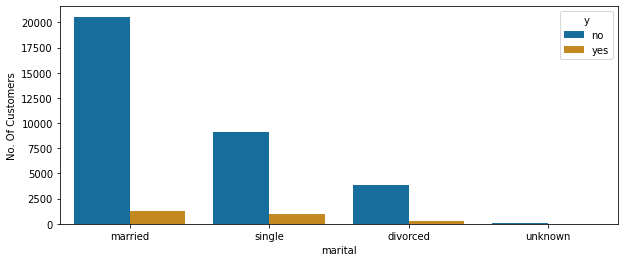

In [ ]:
#shows the no.of customers vs Client Term Deposit Subscription Status 
plt.subplots(figsize=(10,4))
sns.countplot(x ='marital', hue = 'y', data = dfnew, palette = 'colorblind')
plt.ylabel('No. Of Customers')
plt.show

In [ ]:
#Removing the unwanted features
dfnew.drop(['emp.var.rate','euribor3m','nr.employed'],axis=1,inplace=True)
dfnew.head()

In [ ]:
#copying the data to new data variable
dfnew1=dfnew.copy()
dfnew1.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,zscore
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,0.010471
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,-0.421495
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,-0.124518
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,-0.413782
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,0.187886


In [ ]:
bank = dfnew1.rename(columns = {'loan': 'Personal Loan','housing':'Housing Loan','duration':'Last Contact Duration','pdays':'Days passed','previous':'Total no of contacts per client','poutcome':'Campaign Outcome','cons.price.idx':'CPI','cons.conf.idx':'CCI','y':'Term Deposit Subscription Status'}, inplace = False)
bank.head()

,Term Deposit Subscription Status,age,job,marital,education,default,Housing Loan,Personal Loan,contact,month,day_of_week,Last Contact Duration,campaign,Days passed,Total no of contacts per client,Campaign Outcome,CPI,CCI,zscore
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,0.010471
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,-0.421495
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,-0.124518
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,-0.413782
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,0.187886


In [ ]:
#Renamed the column entry of 999 to 28
bank = bank.replace({'Days passed': {999: 28}})
bank.head()

,Term Deposit Subscription Status,age,job,marital,education,default,Housing Loan,Personal Loan,contact,month,day_of_week,Last Contact Duration,campaign,Days passed,Total no of contacts per client,Campaign Outcome,CPI,CCI,zscore
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,28,0,nonexistent,93.994,-36.4,0.010471
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,28,0,nonexistent,93.994,-36.4,-0.421495
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,28,0,nonexistent,93.994,-36.4,-0.124518
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,28,0,nonexistent,93.994,-36.4,-0.413782
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,28,0,nonexistent,93.994,-36.4,0.187886


In [ ]:
#Deleted CPI,CCI,zscore columns
bank.drop(['CPI','CCI'],axis=1,inplace=True)
bank.head()

,Term Deposit Subscription Status,age,job,marital,education,default,Housing Loan,Personal Loan,contact,month,day_of_week,Last Contact Duration,campaign,Days passed,Total no of contacts per client,Campaign Outcome,zscore
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,28,0,nonexistent,0.010471
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,28,0,nonexistent,-0.421495
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,28,0,nonexistent,-0.124518
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,28,0,nonexistent,-0.413782
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,28,0,nonexistent,0.187886


In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in bank.columns:
        if bank[column].dtype == np.number:
            continue
        bank[column] = LabelEncoder().fit_transform(bank[column])
bank.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


,Term Deposit Subscription Status,age,job,marital,education,default,Housing Loan,Personal Loan,contact,month,day_of_week,Last Contact Duration,campaign,Days passed,Total no of contacts per client,Campaign Outcome,zscore
0,0,39,3,1,0,0,0,0,1,6,1,261,0,25,0,1,0.010471
1,0,40,7,1,3,1,0,0,1,6,1,149,0,25,0,1,-0.421495
2,0,20,7,1,3,0,2,0,1,6,1,226,0,25,0,1,-0.124518
3,0,23,0,1,1,0,0,0,1,6,1,151,0,25,0,1,-0.413782
4,0,39,7,1,3,0,0,2,1,6,1,307,0,25,0,1,0.187886


In [ ]:
bank.drop(['zscore'],axis=1,inplace=True)
bank.head()

,Term Deposit Subscription Status,age,job,marital,education,default,Housing Loan,Personal Loan,contact,month,day_of_week,Last Contact Duration,campaign,Days passed,Total no of contacts per client,Campaign Outcome
0,0,39,3,1,0,0,0,0,1,6,1,261,0,25,0,1
1,0,40,7,1,3,1,0,0,1,6,1,149,0,25,0,1
2,0,20,7,1,3,0,2,0,1,6,1,226,0,25,0,1
3,0,23,0,1,1,0,0,0,1,6,1,151,0,25,0,1
4,0,39,7,1,3,0,0,2,1,6,1,307,0,25,0,1


In [ ]:
bank.corr()
#bank.corr(method='pearson')

,Term Deposit Subscription Status,age,job,marital,education,default,Housing Loan,Personal Loan,contact,month,day_of_week,Last Contact Duration,campaign,Days passed,Total no of contacts per client,Campaign Outcome
Term Deposit Subscription Status,1.000000,0.043585,0.033497,0.051549,0.072111,-0.116049,0.017681,-0.009499,-0.149663,0.003463,0.013368,0.223708,-0.074628,-0.396844,0.288018,0.150614
age,0.043585,1.000000,0.003492,-0.389629,-0.118830,0.166683,-0.005518,-0.008551,0.005374,-0.026687,-0.016796,0.005383,0.003978,-0.036321,0.022397,0.020939
job,0.033497,0.003492,1.000000,0.025606,0.136666,-0.027501,0.004530,-0.014612,-0.022687,-0.034001,-0.000879,-0.005684,-0.007535,-0.026679,0.019535,0.012418
marital,0.051549,-0.389629,0.025606,1.000000,0.108907,-0.082707,0.013843,0.004639,-0.056803,-0.007247,0.000693,0.003077,-0.005735,-0.036720,0.039162,0.002668
education,0.072111,-0.118830,0.136666,0.108907,1.000000,-0.184968,0.013704,0.005413,-0.105887,-0.087090,-0.019209,-0.020450,-0.000569,-0.046361,0.035660,0.018861
default,-0.116049,0.166683,-0.027501,-0.082707,-0.184968,1.000000,-0.012571,-0.000875,0.134003,-0.017520,-0.006209,-0.015199,0.034109,0.077720,-0.101543,0.024848
Housing Loan,0.017681,-0.005518,0.004530,0.013843,0.013704,-0.012571,1.000000,0.043986,-0.081782,-0.015435,0.004747,-0.005088,-0.011813,-0.009342,0.021810,-0.015064
Personal Loan,-0.009499,-0.008551,-0.014612,0.004639,0.005413,-0.000875,0.043986,1.000000,-0.009255,-0.004692,-0.012043,-0.011385,0.005327,-0.000661,0.000412,-0.003051
contact,-0.149663,0.005374,-0.022687,-0.056803,-0.105887,0.134003,-0.081782,-0.009255,1.000000,0.278213,-0.011131,-0.023856,0.075975,0.115798,-0.215892,0.124143
month,0.003463,-0.026687,-0.034001,-0.007247,-0.087090,-0.017520,-0.015435,-0.004692,0.278213,1.000000,0.027910,0.017468,-0.062383,-0.046417,0.106070,-0.070209


<function matplotlib.pyplot.show>

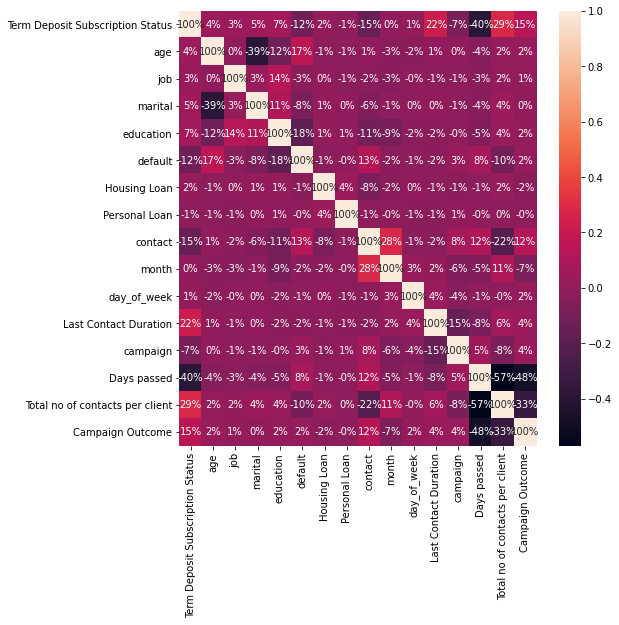

In [ ]:
#correlation visualization
plt.subplots(figsize=(8,8))
sns.heatmap(bank.corr(), annot = True, fmt = '0.0%')
plt.show

In [ ]:
#split data into 70% training and 30% testing.
from sklearn.model_selection import train_test_split
X = bank.iloc[:, 1:bank.shape[1]].values 
Y = bank.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)
X_train

array([[16,  0,  2, ..., 25,  0,  1],
       [40,  1,  0, ..., 25,  0,  1],
       [25,  4,  1, ..., 25,  0,  1],
       ...,
       [14,  0,  2, ..., 25,  0,  1],
       [14,  9,  1, ..., 25,  0,  1],
       [26,  4,  1, ..., 25,  0,  1]])

In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = bank.iloc[:, 1:bank.shape[1]].values 
Y = bank.iloc[:, 0].values 
bank.head()

,Term Deposit Subscription Status,age,job,marital,education,default,Housing Loan,Personal Loan,contact,month,day_of_week,Last Contact Duration,campaign,Days passed,Total no of contacts per client,Campaign Outcome
0,0,39,3,1,0,0,0,0,1,6,1,261,0,25,0,1
1,0,40,7,1,3,1,0,0,1,6,1,149,0,25,0,1
2,0,20,7,1,3,0,2,0,1,6,1,226,0,25,0,1
3,0,23,0,1,1,0,0,0,1,6,1,151,0,25,0,1
4,0,39,7,1,3,0,0,2,1,6,1,307,0,25,0,1


In [ ]:
# Resample the training data with the RandomOversampler
from pathlib import Path
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)
Counter(Y_resampled)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 23484, 1: 23484})

In [ ]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
over_model = LogisticRegression(solver='sag', random_state=100)
over_model.fit(X_resampled, Y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Training Model Score
over_model.score(X_train,Y_train)

0.8028983211910041

In [ ]:
#Testing Model Score
over_model.score(X_test,Y_test)

0.8051732101616628

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# First, define "predictions" variable specifying Oversampling model
predictions = over_model.predict(X_test)

balanced_accuracy_score(Y_test, predictions)

0.7955630166992995

In [ ]:
#intercept 𝑏₀
over_model.intercept_

array([0.00874089])

In [ ]:
#slope 𝑏₁
over_model.coef_

array([[ 0.02734967,  0.01740876,  0.43051421,  0.11579576, -1.2128895 ,
         0.05514067, -0.09682892, -1.07335758,  0.01054168, -0.00797872,
         0.00802013, -0.16722148, -0.13325671,  0.30814401, -0.04784124]])

In [ ]:
#In the matrix below, each row corresponds to a single observation. 
#The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
#The second column is the probability that the output is one, or 𝑝(𝑥).

over_model.predict_proba(X)

array([[0.67830036, 0.32169964],
       [0.91779398, 0.08220602],
       [0.734781  , 0.265219  ],
       ...,
       [0.39147689, 0.60852311],
       [0.10407121, 0.89592879],
       [0.19664808, 0.80335192]])

In [ ]:
#This function returns the predicted output values as a one-dimensional array.
over_model.predict(X)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#plotting confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,over_model.predict(X_test))

TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]



print(cm)
print('The model testing accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[8141 1951]
 [ 158  575]]
The model testing accuracy = 0.8051732101616628


<function matplotlib.pyplot.show>

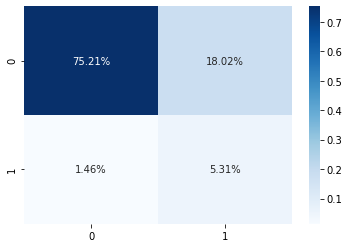

In [ ]:
#Confusion matrix heat map 
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show